# **Linear Regression**

## Introduction

Linear regression is a statistical method that is used to predict a continuous dependent variable based on one or more independent variables. This technique assumes a linear relationship between the dependent and independent variables, which implies that the dependent variable changes proportionally with changes in the independent variables.

In other words, you need to find a function that maps some features or variables to others sufficiently well.The dependent features are called the dependent variables, outputs, or responses. The independent features are called the independent variables, inputs, regressors, or predictors.

Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, or brand.

## Types of Linear Regression

There are two main types of linear regression:

### **1. Simple linear regression:**
This involves predicting a dependent variable based on a single independent variable.
With only one independent variable, and the equation of the regression line is given by:

## $y=mx+b$ or $y=b_{0}+b_{1}x$
Here,
- y is the dependent variable,
- x is the independent variable,
- m/$b_{1}$ is the slope of the line (which represents the change in y for a unit change in x), b/$b_{0}x$ is the y-intercept (the value of y when x is 0).

### **2. Multiple linear regression:** 
This involves predicting a dependent variable based on multiple independent variables.
In multiple linear regression, where there are multiple independent variables (x1, x2, ..., xn), the equation is extended to:

## $y=b_{0}+b_{1}x_{1}+b_{2}x_{2}+....+b_{n}x_{n}$

Here,
- y is the dependent variable,
- x1, x2, ..., xn are the independent variables,
- b0 is the y-intercept,
- b1, b2, ... , bn are the coefficients that represent the change in y for a unit change in each respective independent variable.

It’s a common practice to denote the outputs with 𝑦 and the inputs with x. If there are two or more independent variables, then they can be represented as the vector x=($x_{0},...x_{n}$), where 𝑟 is the number of inputs.

_`Linear Regression is among the simplest regression methods. One of its main advantages is the ease of interpreting results. Let’s consider a scenario where we want to determine the linear relationship between the weight of a dog and age in months. When we are given the age in months, can we estimate the weight of a dog`_

## Linear Regression Implementation in Python

Let's generate synthetic data representing the relationship between dog ages and weights, using linear regression from scikit-learn to model this relationship, and visualize the original data points along with the linear regression line using matplotlib.

There are some basic steps to follow when you’re implementing linear regression. These steps are more or less general for most of the regression approaches and implementations.

### 1. Import Necessary Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

* **numpy** is used for numerical operations.
* **matplotlib.pyplot** is used for creating plots.
* **train_test_split** is from scikit-learn and is used to split the dataset into training and testing sets.
* **LinearRegression** is a class from scikit-learn used to perform linear regression.
* **mean_squared_error & mean_absolute_error** is a function from scikit-learn used to calculate the error.
* **pandas** is imported as pd for data manipulation using DataFrames.

### 2. Generate /Import Data:

In [2]:
np.random.seed(42)
ages = np.random.randint(0, 60, size=300)
weights = 10 + 0.5 * ages + np.random.normal(0, 5, size=300)

* **np.random.seed(42)** ensures reproducibility by fixing the random seed.(42 is the seed value). The seed is an integer that serves as the starting point for the random number sequence.
* ages is an array of 300 random integers between 0 and 60 (representing dog ages in months).
* weights is generated using a linear relationship (10 + 0.5 * ages) with some added random noise.

If you have your own dataset, you can import it using the following code.

In [ ]:
df = pd.read_csv('your_dataset.csv')

# Extract the 'Age' and 'Weight' columns from the DataFrame
ages = df['Age'].values
weights = df['Weight'].values

### 3. Create a pandas DataFrame from the generated data:

In [3]:
df = pd.DataFrame({'Age': ages, 'Weight': weights})
#Here the generated data is converted into a pandas DataFrame.

The generated data, representing dog ages (ages) and corresponding weights (weights), is organized into a pandas DataFrame (df). The **pd.DataFrame** function is used to create a tabular data structure with labeled columns ('Age' and 'Weight'). This step is beneficial because pandas DataFrames provide a convenient way to organize, analyze, and manipulate structured data. The DataFrame structure allows for easy exploration and manipulation of the data using various pandas functions.

### 4. Display information about the DataFrame:

In [4]:
print("DataFrame Shape:", df.shape)
print("\nDataFrame Head:")
print(df.head())
print("\nDataFrame Description:")
print(df.describe())

DataFrame Shape: (300, 2)

DataFrame Head:
   Age     Weight
0   38  26.532838
1   51  40.115813
2   28  32.533025
3   14  21.367947
4   42  31.045722

DataFrame Description:
              Age      Weight
count  300.000000  300.000000
mean    29.930000   25.826362
std     17.793081   10.197088
min      0.000000    1.645671
25%     14.000000   18.017262
50%     31.000000   26.183281
75%     44.000000   33.768457
max     59.000000   47.301901


* **shape** is used to display the number of rows and columns in the DataFrame.
* **head** is used to display the first few rows of the DataFrame.
* **describe** is used to provide summary statistics of the DataFrame.
These functions are helpful for exploring and understanding your dataset before applying machine learning models.

### 5. Reshape the data:

In [5]:
# Reshape the data from a pandas DataFrame
ages_reshaped = df['Age'].values.reshape(-1, 1)
weights = df['Weight'].values

In [ ]:
# Use below code to reshape the data when using directly generated data without DataFrame
ages_reshaped = ages.reshape(-1, 1)

* The **reshape(-1, 1)** method is used to transform the one-dimensional array into a two-dimensional array with one column. The -1 argument in the reshape function is used to automatically infer the number of rows based on the length of the array.

### 6. Split the Data into Training and Testing Sets:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ages_reshaped, weights, test_size=0.2, random_state=42)

* **train_test_split** is used to split the dataset into training and testing sets.
* X_train, X_test are the input features for training and testing.
* y_train, y_test are the corresponding target values (labels) for training and testing.
* test_size=0.2 specifies that 20% of the data will be used for testing, and 80% for training.
* random_state=42 sets the seed for reproducibility in the split.

### 7. Create and Fit the Linear Regression Model:

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

* An instance of the **LinearRegression** class is created. 
* The fit method is used to train the model on the training set.

Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following script to retrieve the intercept:

In [8]:
# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print coefficients and intercept
print(f'\nCoefficients: {coefficients}')
print(f'Intercept: {intercept}')


Coefficients: [0.49967695]
Intercept: 10.731323827720102


In this example, coefficients represents the slope, and intercept represents the y-intercept of the linear equation.

### 8. Make Predictions on the Testing Set:

In [9]:
y_pred = model.predict(X_test)

* Predictions are made using the trained model on the testing set.

### 9. Evaluate the Model:

In [10]:
# Calculate Mean Squarred Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 21.32477052321913
Mean Absolute Error: 3.9370489509407145
Root Mean Squared Error: 4.617875109097162


For regression algorithms, three evaluation indicators are usually used:
* **Mean Squared Error (MSE)** is the mean of the squared errors.
* **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors.
* **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors
* The result is printed, providing a quantitative measure of how well the model performs on the testing set.


There are many factors that contribute to this inaccuracy, some of which are listed here:
* The features we used may not have had a high enough correlation to the values we were trying to predict.
* We assume that this data has a linear relationship, but this is not the case. visual data can help you determine.

### 10. Plot the Results:

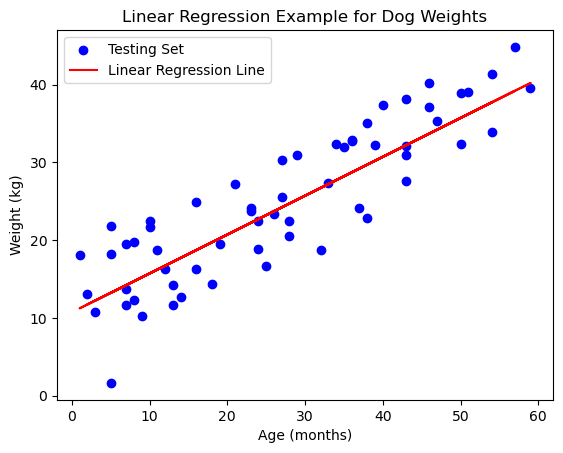

In [11]:
plt.scatter(X_test, y_test, label='Testing Set', color='blue')
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Age (months)')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression Example for Dog Weights')
plt.legend()
plt.show()

* The original data points are scattered using **plt.scatter**.
* The linear regression line is plotted using **plt.plot**.
* **Labels, title, and legend** are added for better understanding.
* **plt.show()** displays the plot.

## Advantages of Linear Regression
- **Simplicity:** Linear regression is straightforward and easy to understand.
- **Clear Insights:** Coefficients provide clear insights into variable relationships.
- **Efficiency:** Computationally efficient, especially with large datasets.
- **Versatility:** No strict assumptions about variable distribution.
- **Feature Selection:** Useful for selecting important features.

## Disadvantages of Linear Regression
- **Linearity Assumption:** Effective only for linear relationships.
- **Outlier Sensitivity:** Impactful sensitivity to outliers.
- **Assumption Challenges:** Assumes independence and homoscedasticity.
- **Multicollinearity Issues:** Problems with highly correlated variables.
- **Categorical Data Handling:** Not ideal for categorical data without adjustments.
- **Overfitting/Underfitting:** Vulnerable to overfitting or underfitting without regularization.

## Summary
The goal of linear regression is to find the values of the coefficients (m, b in simple linear regression, and b0, b1, ... , bn in multiple linear regression) that best fit the observed data, minimizing the difference between the predicted values and the actual values. Linear regression is widely used in various fields for modeling and predicting relationships between variables. However, linear regression is a powerful and interpretable tool but may not be suitable for all types of data and relationships. Consideration of its assumptions and potential challenges is essential for successful application.


## References

To learn more about this topic, please refer to the following resources.
1. Real Python (n.d)<br> https://realpython.com/linear-regression-in-python/
2. GeeksforGeeks (n.d)<br>https://www.geeksforgeeks.org/linear-regression-python-implementation/
3. Scikit-learn (n.d)<br>https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

# **_Haiku_** 🐶 🦮

Furry friend arrives,<br>
kinship blooms, a bond thrives, <br>
paws of love derived.